In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# For displaying all of the columns in dataframe
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, \
roc_auc_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree



In [53]:
data = pd.read_csv('./Loan_default.csv')

In [54]:
data.shape

(255347, 18)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [56]:
data.isna().any().sum()

np.int64(0)

In [57]:
data.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


/var/folders/zx/r_2wbfrd04zgxbmyqnr2633c0000gn/T/ipykernel_6094/3712581952.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Default', data=data, palette='pastel')


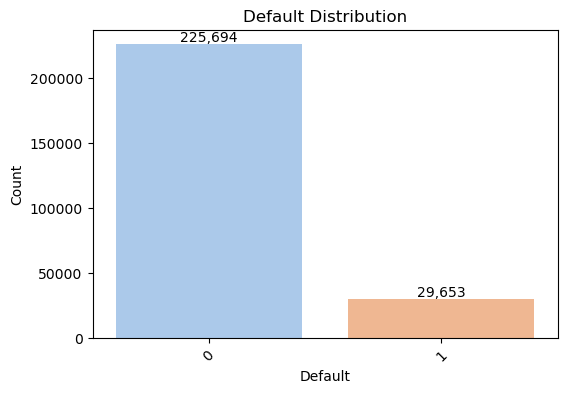

In [59]:


plt.figure(figsize=(6, 4))
sns.countplot(x='Default', data=data, palette='pastel')

plt.title("Default Distribution")
plt.xlabel("Default")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Annotate counts on bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(
        format(int(p.get_height()), ","), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center',
        va='bottom'
    )

plt.show()


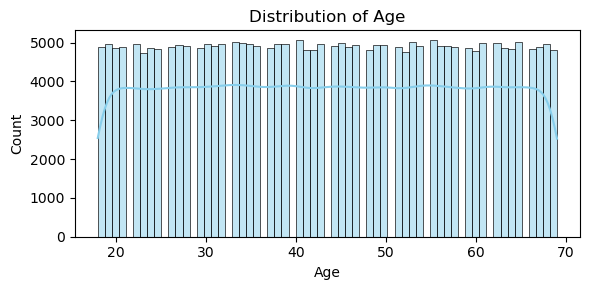

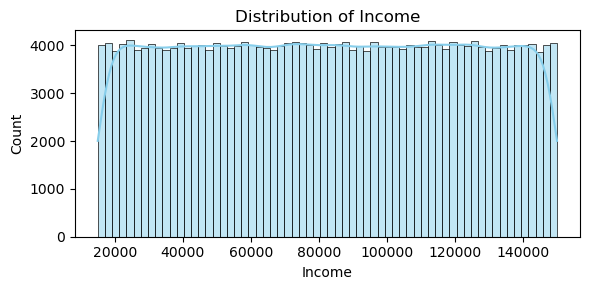

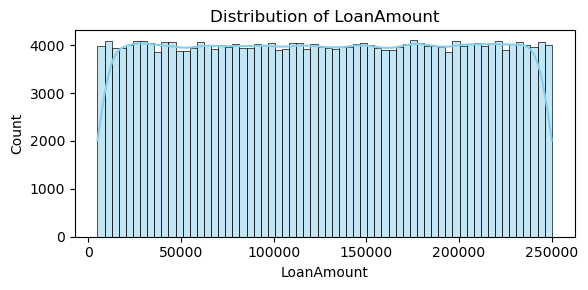

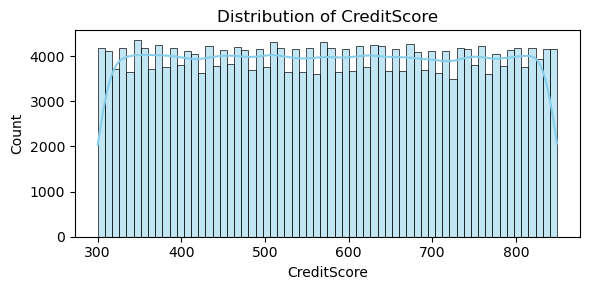

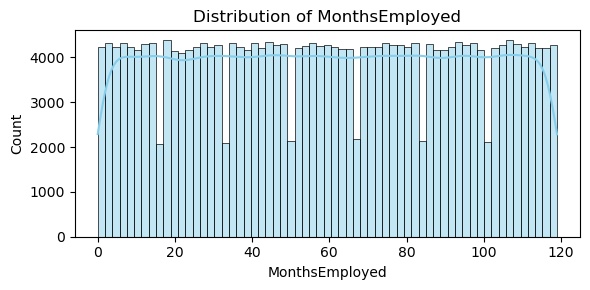

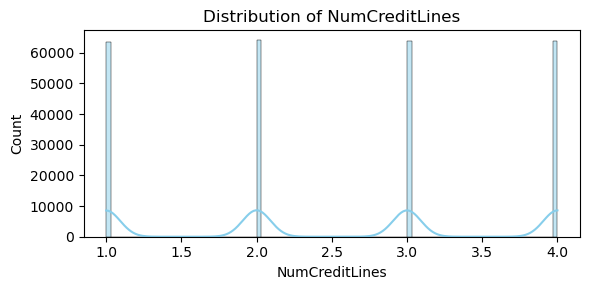

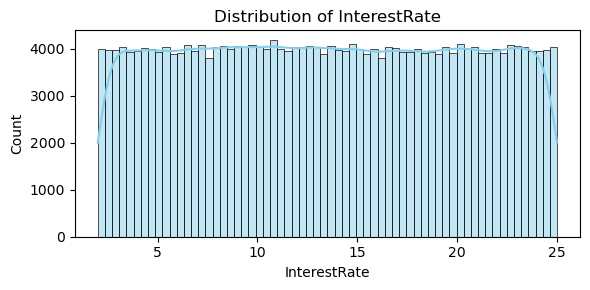

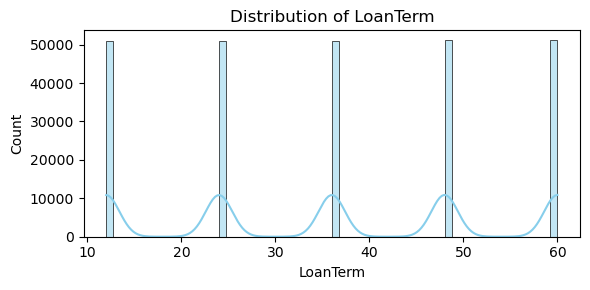

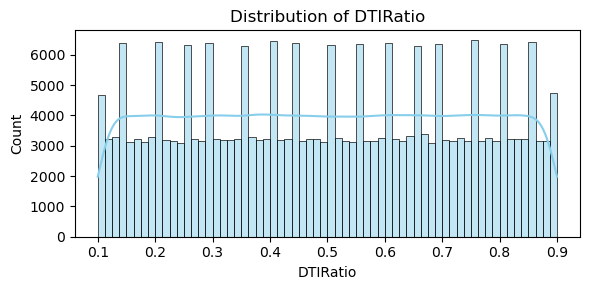

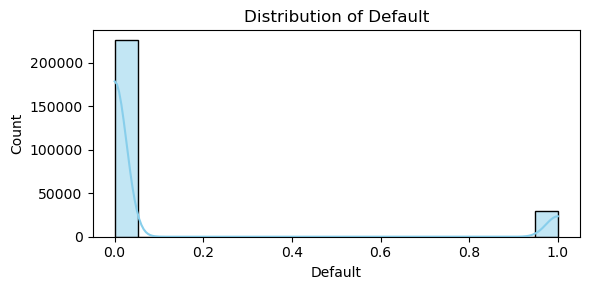

In [60]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution plots for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

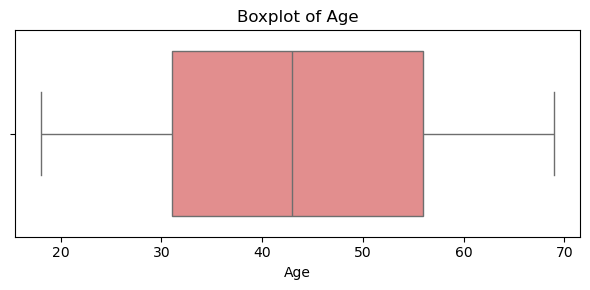

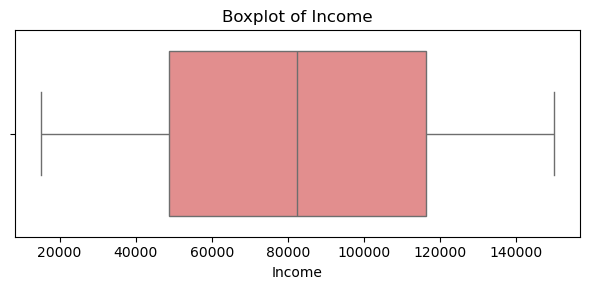

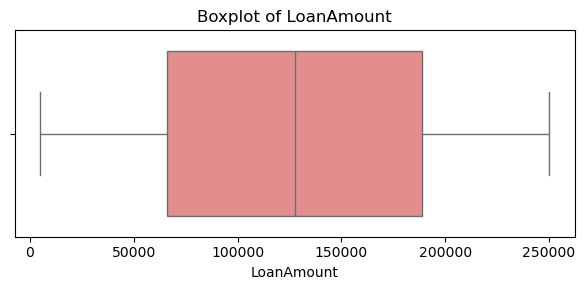

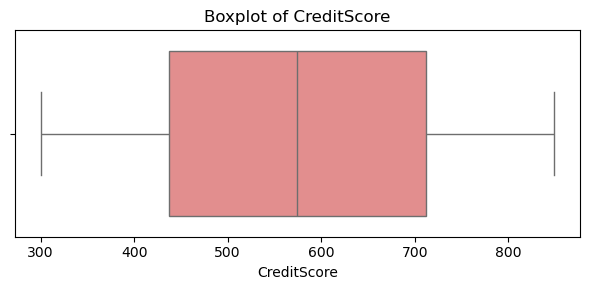

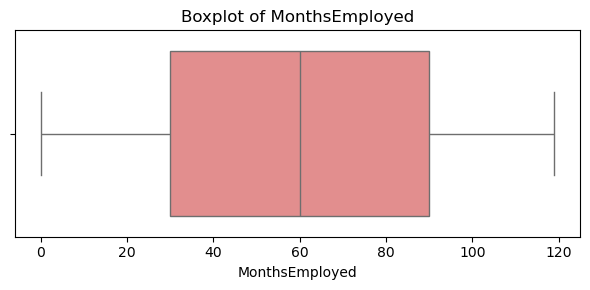

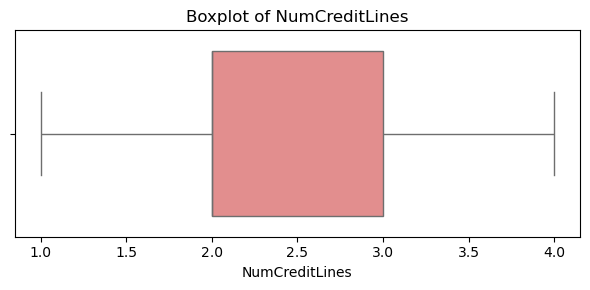

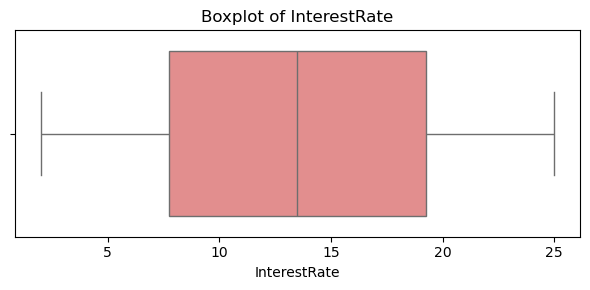

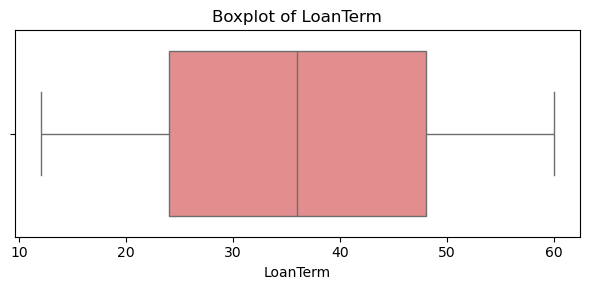

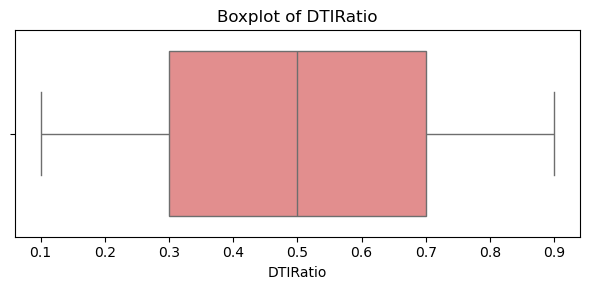

In [63]:
numeric_cols = data.select_dtypes(include=[np.number]).columns.drop(['Default'], errors='ignore').tolist()

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=data[col], color='lightcoral')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

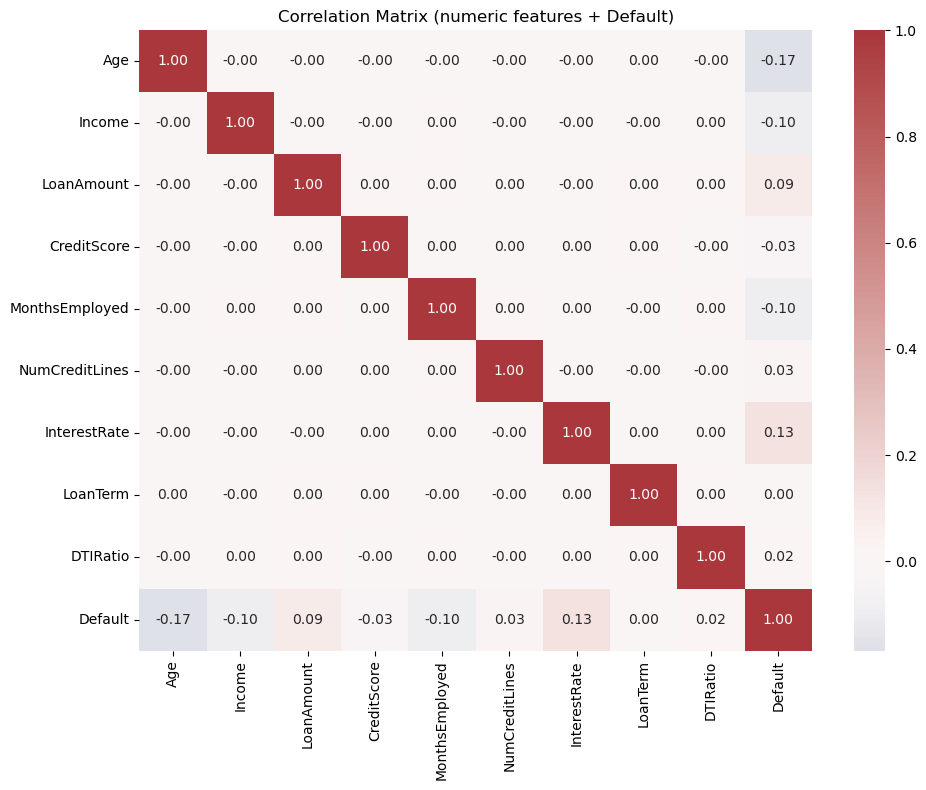

In [64]:
# ensure numeric_cols exists (don't overwrite if already defined)
if 'numeric_cols' not in globals():
    numeric_cols = data.select_dtypes(include=[np.number]).columns.drop(['Default'], errors='ignore').tolist()

#  Correlation heatmap for numeric features (including target)
plt.figure(figsize=(10, 8))
corr_cols = [c for c in numeric_cols if c in data.columns] + (['Default'] if 'Default' in data.columns else [])
sns.heatmap(data[corr_cols].corr(), annot=True, fmt='.2f', cmap='vlag', center=0)
plt.title("Correlation Matrix (numeric features + Default)")
plt.tight_layout()
plt.show()

/var/folders/zx/r_2wbfrd04zgxbmyqnr2633c0000gn/T/ipykernel_6094/3084561049.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=col, data=data, palette='pastel')


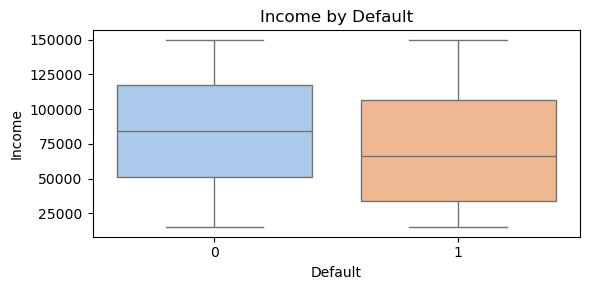

/var/folders/zx/r_2wbfrd04zgxbmyqnr2633c0000gn/T/ipykernel_6094/3084561049.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=col, data=data, palette='pastel')


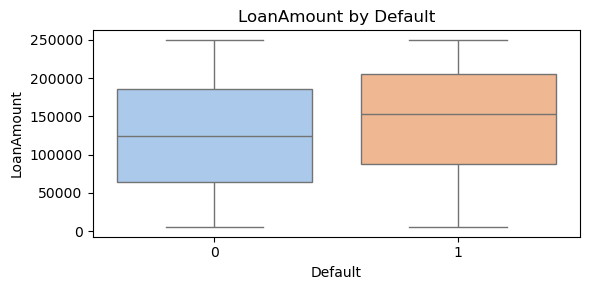

/var/folders/zx/r_2wbfrd04zgxbmyqnr2633c0000gn/T/ipykernel_6094/3084561049.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=col, data=data, palette='pastel')


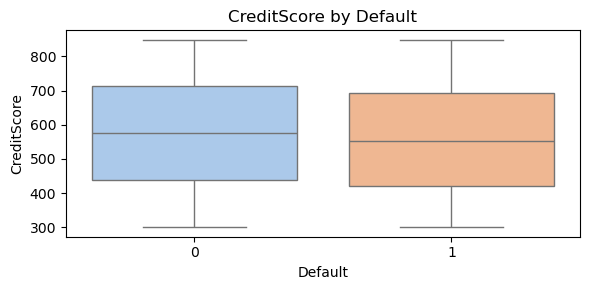

/var/folders/zx/r_2wbfrd04zgxbmyqnr2633c0000gn/T/ipykernel_6094/3084561049.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=col, data=data, palette='pastel')


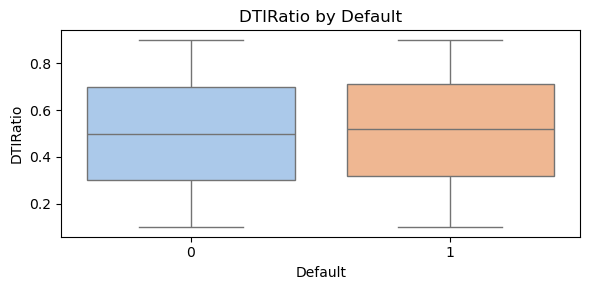

In [65]:
box_features = [f for f in ['Income', 'LoanAmount', 'CreditScore', 'DTIRatio'] if f in data.columns]
for col in box_features:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x='Default', y=col, data=data, palette='pastel')
    plt.title(f"{col} by Default")
    plt.tight_layout()
    plt.show()

/var/folders/zx/r_2wbfrd04zgxbmyqnr2633c0000gn/T/ipykernel_6094/1706152432.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purpose_rate.index, y=purpose_rate.values, palette='rocket')


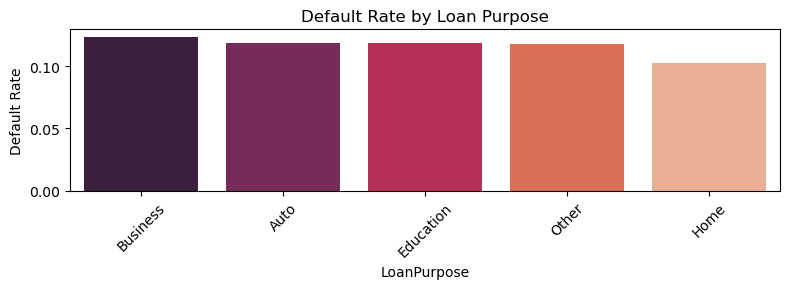

In [66]:
if 'LoanPurpose' in data.columns:
    purpose_rate = data.groupby('LoanPurpose')['Default'].mean().sort_values(ascending=False)
    plt.figure(figsize=(8, 3))
    sns.barplot(x=purpose_rate.index, y=purpose_rate.values, palette='rocket')
    plt.ylabel("Default Rate")
    plt.title("Default Rate by Loan Purpose")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [68]:
# Data Preprocessing 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1) Drop irrelevant columns
if 'LoanID' in data.columns:
    data = data.drop('LoanID', axis=1)

# 2) Handle missing values
data = data.dropna()  # alternatively: data.fillna(method='ffill', inplace=True)

# 3) Encode categorical variables
categorical_cols = [
    'Education', 'EmploymentType', 'MaritalStatus',
    'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner'
]

le = LabelEncoder()
for col in categorical_cols:
    if col in data.columns:
        data[col] = le.fit_transform(data[col].astype(str))

# 4) Separate features and target variable
X = data.drop('Default', axis=1)
y = data['Default']

# 5) Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6) Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (178742, 16)
Testing set shape: (76605, 16)


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd

# use only faster models
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(
        tree_method='hist',  
        eval_metric='logloss',
        random_state=42
        
    )
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)

    results.append([name, acc, prec, rec, f1, roc, specificity, sensitivity])

results_df = pd.DataFrame(results, columns=[
    'Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score',
    'ROC-AUC', 'Specificity', 'Sensitivity'
])

print("Model Evaluation Results:\n")
display(results_df.sort_values(by='Accuracy', ascending=False))

Model Evaluation Results:



,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,Specificity,Sensitivity
2,Random Forest,0.885817,0.616225,0.044402,0.082835,0.733607,0.996367,0.044402
0,Logistic Regression,0.885360,0.624454,0.032149,0.061150,0.749708,0.997460,0.032149
4,XGBoost,0.885360,0.539860,0.086781,0.149525,0.742842,0.990282,0.086781
3,Naive Bayes,0.884838,0.666667,0.016637,0.032463,0.751303,0.998907,0.016637
1,Decision Tree,0.804830,0.204548,0.235612,0.218983,0.557614,0.879617,0.235612


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# sort results
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)
models_sorted = results_df_sorted['Model']

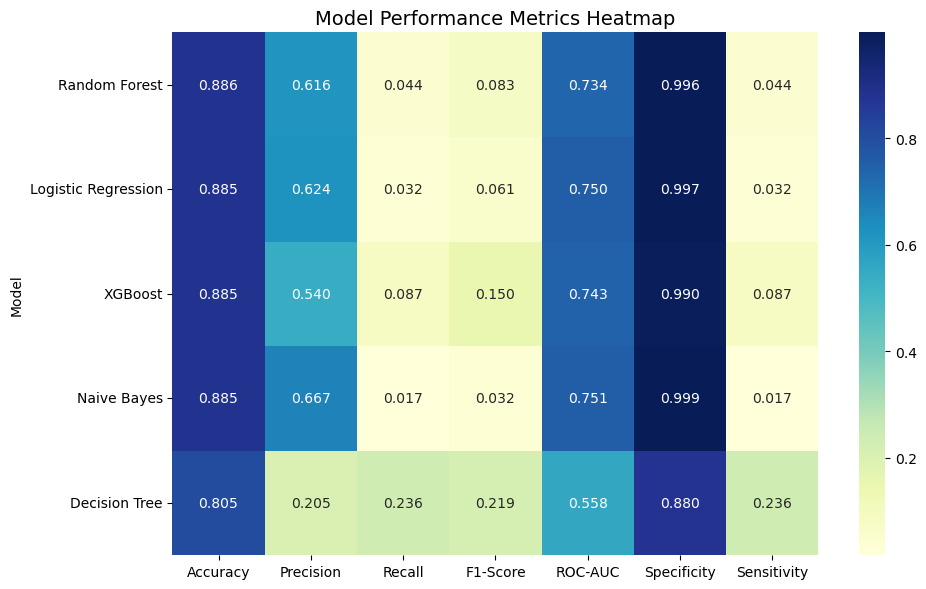

In [73]:
metrics_cols = ['Accuracy','Precision','Recall','F1-Score','ROC-AUC','Specificity','Sensitivity']
plt.figure(figsize=(10,6))
sns.heatmap(results_df_sorted.set_index('Model')[metrics_cols], annot=True, cmap='YlGnBu', fmt=".3f", cbar=True)
plt.title('Model Performance Metrics Heatmap', fontsize=14)
plt.tight_layout()
plt.show()